# **Índice de Sentimento V1**

In [9]:
import numpy as np
import pandas as pd
import os

## *Sentimentos*

In [3]:
sent = pd.read_csv('./data/news/noticias_sentimentos.csv')
sent['Data'] = pd.to_datetime(sent['Data'], format='%Y-%m-%d')
sent.loc[sent['Sentimento'] == 'POSITIVE', 'Score Signal'] = sent.loc[sent['Sentimento'] == 'POSITIVE', 'Score']
sent.loc[sent['Sentimento'] == 'NEGATIVE', 'Score Signal'] = sent.loc[sent['Sentimento'] == 'NEGATIVE', 'Score'] * -1
sent.loc[sent['Sentimento'] == 'NEUTRAL', 'Score Signal'] = 0
sent

,Data,Notícia,Sentimento,Score,Score Signal
0,2024-09-03,Unipar e MELVER estão com inscrições abertas p...,NEUTRAL,0.700441,0.000000
1,2024-09-03,Mercado financeiro hoje: Vale (VALE3) em busca...,NEGATIVE,0.515265,-0.515265
2,2024-09-03,Briga entre X e STF pode afastar investidores ...,NEGATIVE,0.850306,-0.850306
3,2024-09-03,Podcast | Fechamento de Mercado - 03/09/2024,NEUTRAL,0.614209,0.000000
4,2024-09-03,Comentario semanal - Perspectivas,NEUTRAL,0.610426,0.000000
...,...,...,...,...,...
84846,2024-09-03,Bolsa recua com peso da Vale e dados nos EUA; ...,NEGATIVE,0.830644,-0.830644
84847,2024-09-03,PIB do Brasil cresce acima do esperado no 2º t...,POSITIVE,0.772979,0.772979
84848,2024-09-03,Investidores estrangeiros ingressam com R$ 10 ...,POSITIVE,0.731023,0.731023
84849,2024-09-03,Expert XP: como é ser um investidor de curto p...,NEUTRAL,0.667090,0.000000


In [4]:
# ### Código antigo Guigas ###

# sentimentos_g = []
# sentimentos_t = []
# for data in sent['Data'].unique():
#     dia = sent[sent['Data'] == data]
#     if dia['Sentimento'].value_counts().shape[0] != 1:
#         total_dia_g = dia[dia['Sentimento'] != 'NEUTRAL']['Score'].sum() + dia[dia['Sentimento'] == 'NEUTRAL']['Score'].sum() * 0.5
#         total_dia_t = len(dia[dia['Sentimento'] != 'NEUTRAL']) + len(dia[dia['Sentimento'] == 'NEUTRAL']) * 0.5
#         soma_dia = dia['Score Signal'].sum()
#         sentimentos_g.append(soma_dia/total_dia_g)
#         sentimentos_t.append(soma_dia/total_dia_t)
#     else:
#         media = dia['Score Signal'].mean()
#         sentimentos_g.append(media)         
#         sentimentos_t.append(media)
        
# sentimentos_df = pd.DataFrame(sentimentos_g, index=sent['Data'].unique())
# sentimentos_df.columns = ['Sentimento Guigas']
# sentimentos_df['Sentimento Theozão'] = sentimentos_t
# sentimentos_df.describe()

,Sentimento Guigas,Sentimento Theozão
count,3654.000000,3654.000000
mean,-0.229393,-0.159444
std,0.238178,0.166426
min,-0.937513,-0.722036
25%,-0.395361,-0.271986
50%,-0.237676,-0.161765
75%,-0.070988,-0.048123
max,0.717210,0.630277


In [5]:
def indicador_sentimento(freq='D')
    def agg_score(group):
        if group['Sentimento'].nunique() > 1:
            signal = group['Score Signal'].sum() / group['Score Modificado'].sum()
            return signal
        else:
            return group['Score Signal'].mean()

    sent['Score Modificado'] = np.where(sent['Sentimento'] == "NEUTRAL", 0.5, 1) * sent['Score']
    sentimentos_df = sent.resample(freq, on='Data').apply(agg_score).to_frame(name='Signal')
    return sentimentos_df

,Signal
count,522.000000
mean,-0.233909
std,0.133286
min,-0.651532
25%,-0.323847
50%,-0.230830
75%,-0.138559
max,0.259835


[*********************100%***********************]  1 of 1 completed

C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\yfinance\utils.py:689: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


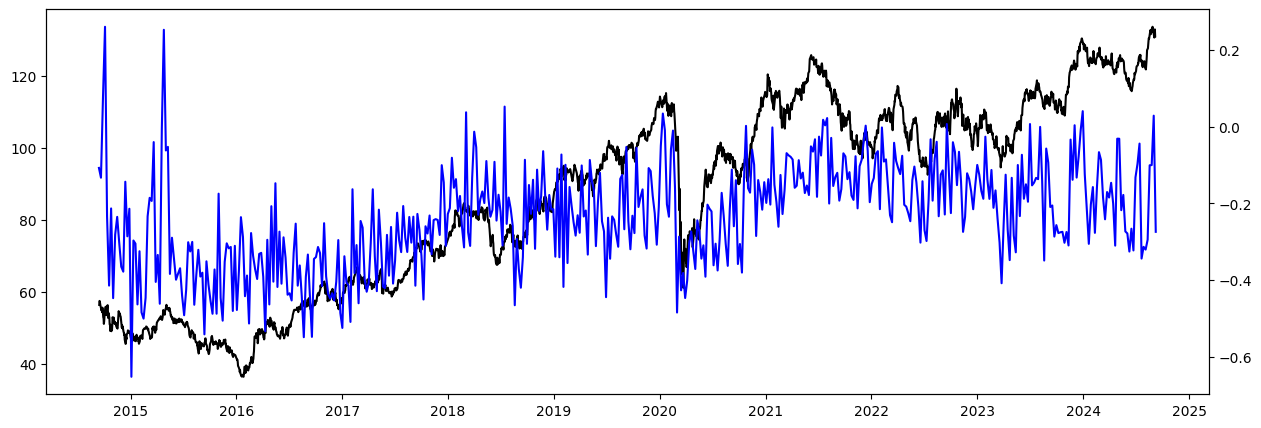

In [6]:
import matplotlib.pyplot as plt
import yfinance as yf

ticker = 'BOVA11.SA'

dados = yf.download(ticker, start=min(sentimentos_df.index), end=max(sentimentos_df.index))['Adj Close']

fig, ax = plt.subplots(figsize=(15, 5))

ax2 = ax.twinx()
ax.plot(dados, color='black')
ax2.plot(sentimentos_df['Signal'], color='blue')

plt.show()

In [7]:
dados_agg = dados.resample('W').mean()
df_dados = dados_agg.to_frame().merge(sentimentos_df, left_on='Date', right_on='Data', how='left')
df_dados['Signal'].corr(df_dados['Adj Close'])

0.5745814689809325

In [10]:
sentimentos_df.to_csv('./data/news/sentimentos.csv')

## *Índice de Sentimento*

EmotiWand = 0.25(Volatilidade) + 0.25(Momentum e Volume) + 0.40(Sentimentos) + 0.10(Trends)

In [38]:
import pandas as pd

vix = pd.read_excel('./data/vix/PerformanceGraphExport.xls')
vol = pd.read_excel('./data/vix/IVol-BR.xls')
vol_mom = pd.read_csv('./data/momentum_vol/ibov_vol_rsi.csv')
sent = pd.read_csv('./data/news/noticias_sentimentos.csv')
trends = pd.read_csv('./data/trends/interesses_google.csv')

In [39]:
import datetime as dt

vix['Data'] = pd.to_datetime(vix['Effective date '])
vol['Data'] = vol[['year', 'month', 'day']].apply(lambda x: dt.datetime(x.iloc[0], x.iloc[1], x.iloc[2]), axis=1)
vol_mom['Data'] = pd.to_datetime(vol_mom['Date'])
trends['Data'] = pd.to_datetime(trends['date'])
sent['Data'] = pd.to_datetime(sent['Data'])

start = sent['Data'].min().strftime('%Y-%m-%d')
end = sent['Data'].max().strftime('%Y-%m-%d')
print(f'{start} - {end}')

2014-09-08 - 2024-09-08


In [40]:
vix['ivolbr'] = vix['S&P/B3 Ibovespa VIX']
vix_total = pd.concat([vix, vol])[['Data', 'ivolbr']].sort_values('Data')

In [41]:
df = pd.merge_ordered(vix_total, vol_mom, on='Data', how='outer')
df = pd.merge_ordered(df, sent, on='Data', how='outer')
df = pd.merge_ordered(df, trends, on='Data', how='outer')

df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

C:\Users\Andre\AppData\Local\Temp\ipykernel_12576\1051337680.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Andre\AppData\Local\Temp\ipykernel_12576\1051337680.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [42]:
df.drop(columns=['Date', 'Notícia', 'date', 'Sentimento'], inplace=True)
df.set_index('Data', inplace=True)
df['trends'] = df.drop(columns=['ivolbr', 'RSI_14', 'Volume', 'Score']).mean(axis=1)
df = df[['ivolbr', 'RSI_14', 'Volume', 'Score', 'trends']]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90267 entries, 2011-08-01 to 2024-09-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ivolbr  90267 non-null  float64
 1   RSI_14  90267 non-null  float64
 2   Volume  90267 non-null  float64
 3   Score   90267 non-null  float64
 4   trends  90267 non-null  float64
dtypes: float64(5)
memory usage: 4.1 MB


In [47]:
import pandas as pd

df = pd.read_csv('./data/df_final.csv', index_col=0)

def min_max_scaler(window):
    print(window)
    return 

df_copy = df.copy()

df_scaled = df_copy.rolling(window=5).mean()

df_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Index: 90267 entries, 2011-08-01 to 2024-09-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ivolbr  90267 non-null  float64
 1   RSI_14  90267 non-null  float64
 2   Volume  90267 non-null  float64
 3   Score   90267 non-null  float64
 4   trends  90267 non-null  float64
dtypes: float64(5)
memory usage: 4.1+ MB


None